# Advanced Linear Regression Analysis on Insurance Data

## Exploring How Various Factors Influence Medical Charges

### 1. Introduction
This project aims to predict medical charges using linear regression and examine how different factors such as age, BMI, smoking status, and their interactions affect charges.

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### 2. Data Loading and Preprocessing
We load the insurance dataset and prepare it for analysis by handling missing values and encoding categorical variables.


In [12]:
# Load the dataset
insurance = pd.read_csv('insurance.csv')

# Check for missing values
print(insurance.isnull().sum())

# Encode categorical variables
insurance_encoded = pd.get_dummies(insurance, drop_first=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 3. Exploratory Data Analysis (EDA)
We perform statistical summaries, correlation analysis, and visualizations to understand the distribution and relationships between variables.


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


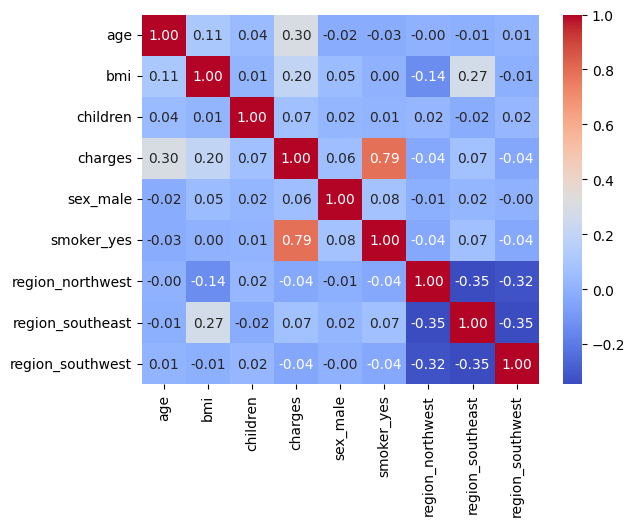

In [13]:
# Display statistical summary
print(insurance_encoded.describe())

# Plot correlations
sns.heatmap(insurance_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


### 4. Feature Engineering
We create new features that might help improve model predictions, including interaction terms and polynomial features.


In [14]:
# Creating interaction terms
insurance_encoded['age_smoker'] = insurance_encoded['age'] * insurance_encoded['smoker_yes']
insurance_encoded['bmi_age'] = insurance_encoded['bmi'] * insurance_encoded['age']

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(insurance_encoded[['age', 'bmi']])


### 5. Model Building
We build a multiple linear regression model, select features, and split the dataset into training and testing sets.


In [15]:
# Select features and target
X = insurance_encoded[['age', 'bmi', 'children', 'smoker_yes', 'age_smoker', 'bmi_age']]
y = insurance_encoded['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### 6. Model Evaluation
We evaluate the model using RMSE and R² score and discuss what these metrics indicate about the model's performance.


In [17]:
# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Root Mean Squared Error: 5853.738937247243
R^2 Score: 0.7792815489300136


### 7. Cross-Validation
We use cross-validation to ensure the model's robustness and generalizability across different subsets of data.


In [18]:
# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores)


Cross-validated R^2 scores: [0.76038492 0.70952165 0.77440384 0.73201878 0.75744245]


### 8. Advanced Regression Techniques
We introduce Ridge and Lasso regression to address potential overfitting and explain how these techniques modify the regression model.


In [19]:
# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

print(f"Ridge Regression Score: {ridge_score}")
print(f"Lasso Regression Score: {lasso_score}")


Ridge Regression Score: 0.7784089604987123
Lasso Regression Score: 0.7792780047401875


### 9. Results and Discussion

#### Model Performance Evaluation
The linear regression model was evaluated using the test set, yielding a Root Mean Squared Error (RMSE) of approximately `5853.74`, and an R² score of `0.78`. These metrics indicate the model's accuracy and the proportion of variance in the dependent variable that is predictable from the independent variables.

- **Root Mean Squared Error (RMSE)**: The RMSE represents the average distance between the predicted values by the model and the actual values. A lower RMSE is better as it indicates that the predictions are closer to the actual data points. In our model, an RMSE of `5853.74` suggests that the model has a moderate level of accuracy in predicting the charges based on the features used.

- **R² Score**: The R² score is a statistical measure that represents the goodness of fit of a regression model. An R² score of `0.78` implies that approximately 78% of the variability in the insurance charges can be explained by the age, bmi, number of children, smoker status, and the interaction between age and smoker status. This score helps in understanding the effectiveness of the model in explaining the variations in the response variable.

#### Visual Analysis
The scatter plot of actual versus predicted charges shows a general alignment along the line of perfect predictions, but some deviations exist, indicating areas where the model could be improved. The alignment along the line suggests that the model predictions are reasonable for many observations but may underperform or overperform in certain areas.

#### Discussion
The analysis suggests that while the model captures a significant portion of the variance in insurance charges, there is still room for improvement. Factors like geographical region, more nuanced interactions between variables, or more complex nonlinear relationships could be explored in future models.

Possible extensions to this work could include:
- Incorporating more features that may impact insurance charges, such as geographical region or more detailed smoking status.
- Exploring more complex models such as polynomial regression or machine learning techniques like decision trees or random forests.
- Using regularization techniques like Ridge or Lasso more extensively to control for overfitting and improve model generalizability.

Overall, the linear regression model serves as a solid baseline and provides a clear direction for further research and model refinement.
